# Exercise 16 – Voting and Ethnicity in Malaysia during General Election

### Introduction

The learning goals for this script are as follows:

- Use R-squared to assess predictive power of linear models
- Examine the residuals from linear models
- Think about outliers, leverage, and influence

To achieve these goals, we will spend today’s class analyzing the relationship between voting and ethnicity in the following, recent general elections in Malaysia:

- 2013 General Election
- 2018 General Election


Import ge2013.csv as a data frame ge13 and inspect:

In [18]:
ge13 <- read.csv("C:/Users/User/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 16 - Malaysian General Election/ge2013.csv", row.names = 1)

In [19]:
str(ge13)

'data.frame':	166 obs. of  10 variables:
 $ DISTNO  : Factor w/ 166 levels "P001","P002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ STATE   : Factor w/ 14 levels "FT Kuala Lumpur",..: 12 12 12 5 5 5 5 5 5 5 ...
 $ DISTNAME: Factor w/ 166 levels "ALOR GAJAH","ALOR STAR",..: 97 53 4 82 50 77 100 118 2 67 ...
 $ VOTESBN : int  21473 23343 19376 21407 24161 33334 20654 32263 25491 37923 ...
 $ VOTESPR : int  14047 19306 18005 9546 20891 22890 16212 36198 27364 42870 ...
 $ malay   : num  83.5 79.3 86.7 91 90.2 ...
 $ chinese : num  11.5 17.7 8.8 6.7 8.2 ...
 $ indian  : num  1.09 1.84 1.58 2.12 0.06 1.27 0.2 2.28 4.16 1.26 ...
 $ other   : num  4 1.15 2.92 0.22 1.51 0.43 5.72 0.76 0.33 0.27 ...
 $ pctBN   : num  60.5 54.7 51.8 69.2 53.6 ...


Dataset contains 166 constituency-level observations from the 2013 Malaysian general election. Observations come from the states of peninsular Malaysia (exclude states in East Malaysia).

A codebook with descriptions of the variables and where they were collected were circulated as part of the pre-class materials. However, to review the critical variables for the first half of today’s activity:

- DISTNO and DISTNAME: The constituency number and name
- pctBN: Percent of the votes cast for ruling Barisan Nasional (BN) coalition out of the total number of valid votes cast in the constituency. The BN was in power from independence in 1957 until 2018.

With respect to the ethnic composition of constituencies, the following variables are included:

- MALAY: Percent of voters in the constituency classified as ethnic Malay.
- CHINESE: Percent of voters in the constituency classified as ethnic Chinese.
- INDIAN: Percent of voters in the constituency classified as ethnic Indian.
- OTHER: Percent of voters in the constituency classified as “other” ethnicity (e.g. Eurasian, Thai).

## Challenge 1
Let’s begin out analysis of voting and ethnicity in Malaysia by examining BN vote share and whether it is related to ethnicity.

### Step 1: Make a histogram of BN Vote Share
BEFORE making any more plots, discuss the following based on context:
- What patterns do you expect between BN vote share and ethnicity?
- How much of the variation in BN vote share would you guess that ethnicity might account for?
- Why do you expect this to be the case?

DISTNO,STATE,DISTNAME,VOTESBN,VOTESPR,malay,chinese,indian,other,pctBN
P001,Perlis,PADANG BESAR,21473,14047,83.48,11.50,1.09,4.00,60.45327
P002,Perlis,KANGAR,23343,19306,79.26,17.74,1.84,1.15,54.73282
P003,Perlis,ARAU,19376,18005,86.72,8.80,1.58,2.92,51.83382
P004,Kedah,LANGKAWI,21407,9546,90.96,6.70,2.12,0.22,69.15969
P005,Kedah,JERLUN,24161,20891,90.23,8.20,0.06,1.51,53.62914
P006,Kedah,KUBANG PASU,33334,22890,95.72,2.57,1.27,0.43,59.28785


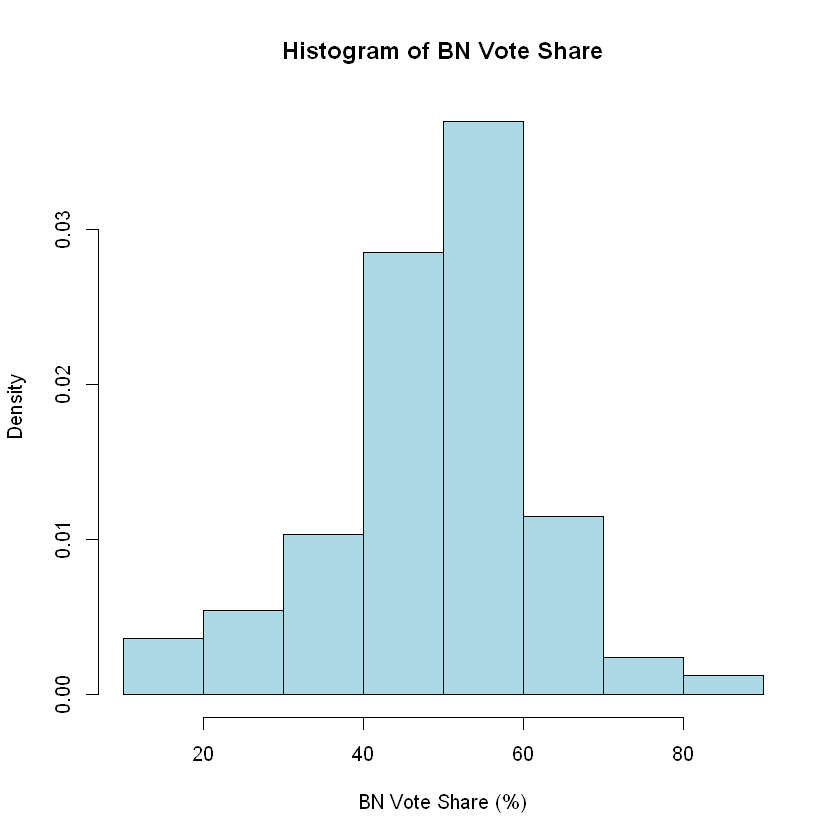

In [22]:
hist(ge13$pctBN, 
     freq=FALSE, 
     col="lightblue",
     main = "Histogram of BN Vote Share",
     xlab = "BN Vote Share (%)")

## Challenge 2

With the patterns you expect to see between BN vote share and ethnicity in mind, let’s now use the ethnic composition of constituencies to predict BN vote shares. Let’s start with the percentages of Malay and Chinese voters.

### Step 2: Make scatter plots of BN vote shares by the percentage of voters classified as Malay and Chinese
- Assess which conditions appear to be met for a linear model

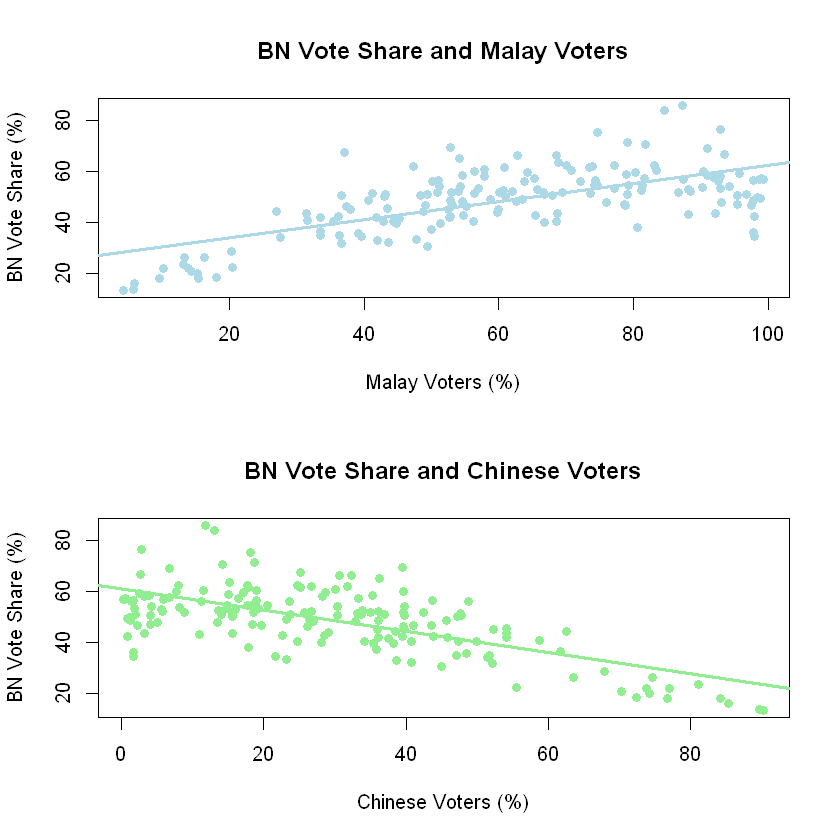

In [38]:
par(mfrow=c(2, 1))

# PLOT THE SCATTER PLOT OF MALAYS
plot(pctBN ~ malay, 
     data=ge13, 
     col="lightblue", 
     pch=19,
     xlab="Malay Voters (%)", 
     ylab="BN Vote Share (%)",
     main="BN Vote Share and Malay Voters")

abline(lm(pctBN ~ malay, data=ge13), lwd = 3, col = "lightblue")

# PLOT THE SCATTER PLOT OF CHINESE
plot(pctBN ~ chinese, 
     data=ge13, 
     col="lightgreen", 
     pch=19,
     xlab="Chinese Voters (%)", 
     ylab="BN Vote Share (%)",
     main="BN Vote Share and Chinese Voters")

abline(lm(pctBN ~ chinese, data=ge13), lwd = 3, col = "lightgreen")

### Step 3: Estimate, interpret, and compare linear models
- What are the intercepts and slopes? How would you interpret them?
- What are the R-squares? How would you interpret them?
- What about the residual standard errors?

In [33]:
# ESTIMATE LINEAR MODELS

lm13.BN.MALAY   <- lm(pctBN ~ malay, data=ge13)
lm13.BN.CHINESE <- lm(pctBN ~ chinese, data=ge13)

# INTERPRET THE INTERCEPTS AND THE SLOPES OF THE LINEAR MODELS
coef(lm13.BN.MALAY)
coef(lm13.BN.CHINESE)

# NOW INTERPRET THE R SQUARES
print("R-Squared Values:")
summary(lm13.BN.MALAY)$r.squared
summary(lm13.BN.CHINESE)$r.squared

# NOW FIND THE RESIDUAL STANDARD ERRORS / STANDARD DEVIATION OF THE RESIDUALS
print("Residual Standard Deviations:")
sd(lm13.BN.MALAY$residuals)
sd(lm13.BN.CHINESE$residuals)

(Intercept)       malay 
 26.9520696   0.3534643

(Intercept)     chinese 
  60.873960   -0.412503

[1] "R-Squared Values:"


[1] 0.4398053

[1] 0.455778

[1] "Residual Standard Deviations:"


[1] 9.812739

[1] 9.671834

### Step 4: After you estimate the models, make residual plots:
- What do you find?
- Can you explain what it means vis-a-vis the conditions for a linear model?

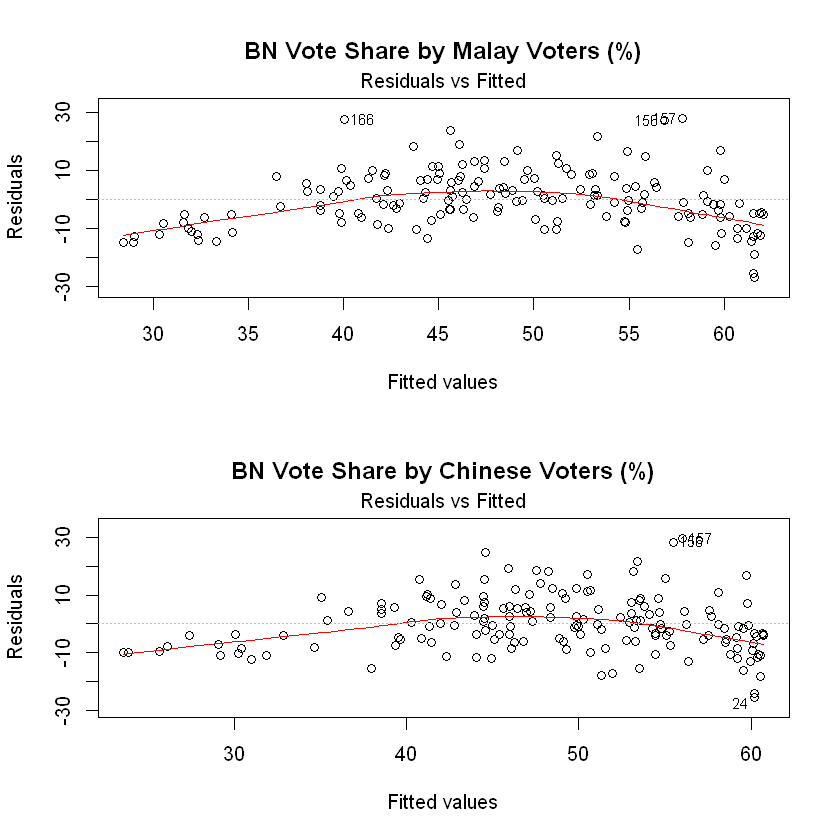

In [35]:
par(mfrow = c(2,1))

plot(lm13.BN.MALAY,
    which = 1,
    main = "BN Vote Share by Malay Voters (%)",
    sub.caption = "BN Vote Share (%)")

plot(lm13.BN.CHINESE,
    which = 1,
    main = "BN Vote Share by Chinese Voters (%)",
    sub.caption = "BN Vote Share (%)")

## Discussion
Let’s take a moment to pause, think, and talk about the models so far:

What have we found?
- Positive relationship between percent Malay voters and BN vote share
- Negative relationship between percent Chinese voters and BN vote share
- CHINESE more predictive of BN vote share than MALAY
- Residuals suggest relationship not strictly linear

Things to think about:
- Did you expect CHINESE to be more predictive than MALAY
- What might explain the curve in the relationship?
- What further might we do to find out?

## MALAYSIAN GENERAL ELECTION 2018 ANALYSIS

For the second half of this script, we will be using the dataset ge2018.csv to practice fitting and assessing linear models.

To provide some background on the 2018 general election:

1. Fought largely between the Barisan Nasional (BN) coalition and the opposition Pakatan Harapan (PH) coalition:
- BN led by Prime Minister Najib Razak
- PH led by former Prime Minister Mahathir Mohamad

2. Election played out against backdrop of a major scandal over embezzlement funds from Malaysia’s 1MDB sovereign wealth fund (Najib accused of taking USD 700 million - currently on trial)


3. The PH coalition defeated the BN:
- First non-BN/UMNO-led government since Malaysia’s independence in 1957
- Transition raised hopes of a Malaysia Baru (a new Malaysia) and that the country could potentially move beyond the politics of race/ethnicity that had dominated since independence

Import ge2018.csv as a data frame ge18 and inspect:

In [9]:
ge18 <- read.csv("ge2018.csv")
str(ge18)

'data.frame':	222 obs. of  12 variables:
 $ ï..DISTNO: Factor w/ 222 levels "P001","P002",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ STATE    : Factor w/ 16 levels "Johor","Kedah",..: 8 8 8 2 2 2 2 2 2 2 ...
 $ DISTNAME : Factor w/ 222 levels "ALOR GAJAH","ALOR SETAR",..: 129 68 4 107 63 100 132 153 2 90 ...
 $ VOTESBN  : int  15032 15306 16547 10061 12413 16975 16384 18390 14181 19400 ...
 $ VOTESPH  : int  13594 20909 11691 18954 18695 29984 7254 28959 32475 36624 ...
 $ VOTERS   : int  46096 55938 48187 42697 54132 73881 46644 86892 80272 97753 ...
 $ TURNOUT  : int  37432 45703 40433 35250 44822 61452 39932 71910 65096 80555 ...
 $ AREA     : int  450 141 222 469 316 634 1357 322 111 233 ...
 $ BUMI     : num  0.876 0.819 0.878 0.907 0.913 0.869 0.922 0.816 0.637 0.783 ...
 $ CHINESE  : num  0.085 0.152 0.077 0.065 0.069 0.085 0.013 0.155 0.317 0.203 ...
 $ INDIAN   : num  0.009 0.017 0.017 0.024 0.001 0.035 0.002 0.025 0.042 0.011 ...
 $ OTHER    : num  0.031 0.012 0.029 0.004 0.017 0.012 0.

Dataset includes 222 observations for all constituencies. Includes constituencies from peninsular Malaysia as well as from the East Malaysian states of Sabah and Sarawak.

In [ ]:
ge2018 <- read.csv("C:/Users/User/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 16 - Malaysian General Election/ge2018.csv")

## Challenge 1

Let’s start by replicating the main analysis for 2013 using the 2018 data.

### Step 5: Make a histogram of BN Vote Share
- Notice that the dataset does not contain a variable pctBN
- So create pctBN using VOTESBN and TURNOUT, and append

ï..DISTNO,STATE,DISTNAME,VOTESBN,VOTESPH,VOTERS,TURNOUT,AREA,BUMI,CHINESE,INDIAN,OTHER,pctBN
P001,Perlis,PADANG BESAR,15032,13594,46096,37432,450,0.876,0.085,0.009,0.031,40.15815
P002,Perlis,KANGAR,15306,20909,55938,45703,141,0.819,0.152,0.017,0.012,33.49014
P003,Perlis,ARAU,16547,11691,48187,40433,222,0.878,0.077,0.017,0.029,40.92449
P004,Kedah,LANGKAWI,10061,18954,42697,35250,469,0.907,0.065,0.024,0.004,28.54184
P005,Kedah,JERLUN,12413,18695,54132,44822,316,0.913,0.069,0.001,0.017,27.69399
P006,Kedah,KUBANG PASU,16975,29984,73881,61452,634,0.869,0.085,0.035,0.012,27.62319


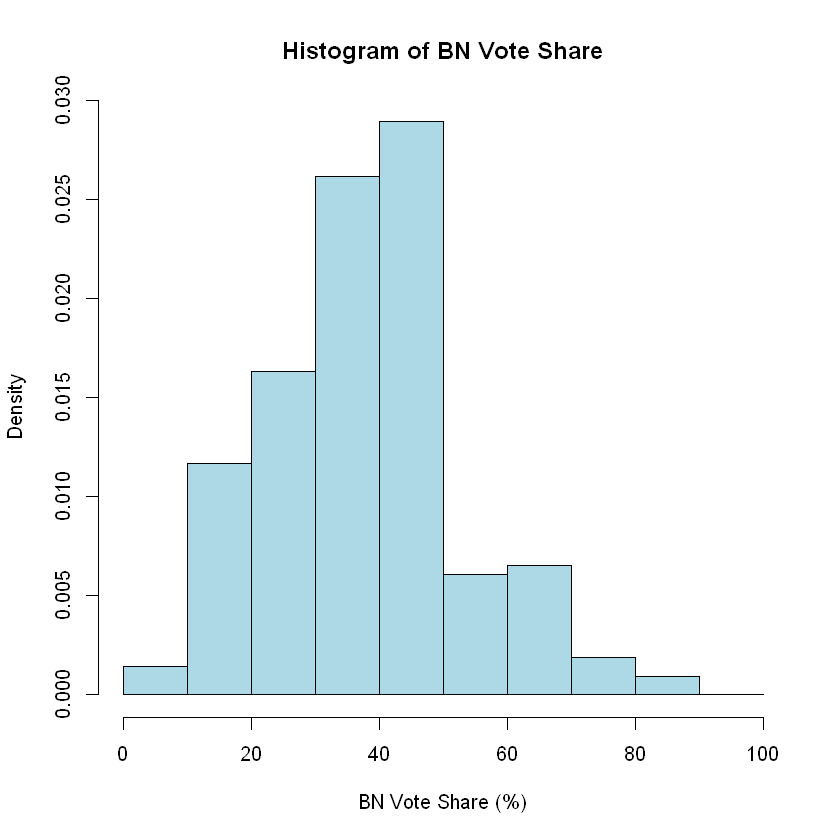

In [40]:
head(ge18)

# FIND THE PERCENTAGE OF THE VOTES

ge18$pctBN <- 100 * (ge18$VOTESBN/ge18$TURNOUT)

# PLOT THE HISTOGRAM

hist(ge18$pctBN, 
     freq=FALSE, 
     col="lightblue", 
     breaks=seq(0, 100, 10),
     main = "Histogram of BN Vote Share",
     xlab = "BN Vote Share (%)")

### Step 6: Make a scatter plot of BN Vote Share by the proportion of voters classified as Bumiputera
- Assess which conditions appear to be met for a linear model

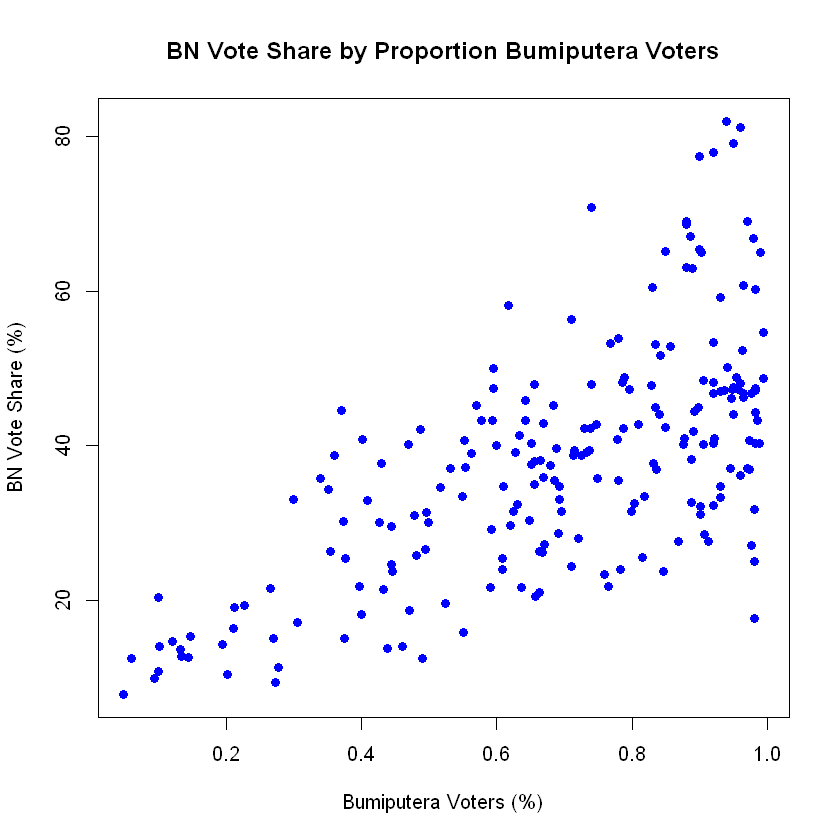

In [41]:
plot(pctBN ~ BUMI, 
     data=ge18, 
     col="blue", 
     pch=19,
     xlab="Bumiputera Voters (%)", 
     ylab="BN Vote Share (%)",
     main="BN Vote Share by Proportion Bumiputera Voters")

### Step 7: Estimate linear models for BN Vote Share and all ethnicities
- Which model has the highest predictive power?
- Is it the same as in the 2013 general election?

In [43]:
# CREATE LINEAR MODELS 

lm18.BN.BUMI    <- lm(pctBN ~ BUMI,    data=ge18)
lm18.BN.CHINESE <- lm(pctBN ~ CHINESE, data=ge18)
lm18.BN.INDIAN  <- lm(pctBN ~ INDIAN,  data=ge18)
lm18.BN.OTHER   <- lm(pctBN ~ OTHER,   data=ge18)

# FIND THE COEFFICIENTS

coef(lm18.BN.CHINESE)
coef(lm13.BN.CHINESE)

(Intercept)     CHINESE 
   48.48178   -43.26668

(Intercept)     chinese 
  60.873960   -0.412503

In [45]:
# CHECK WHICH MODEL HAS THE HIGHEST PREDICTIVE POWER (THE HIGHER THE BETTER)

summary(lm18.BN.BUMI)$r.squared
summary(lm18.BN.CHINESE)$r.squared
summary(lm18.BN.INDIAN)$r.squared
summary(lm18.BN.OTHER)$r.squared

# SINCE BUMI HAS THE HIGHEST VALUE, THUS IT HAS THE HIGHEST PREDICTIVE POWER

[1] 0.4411699

[1] 0.3768821

[1] 0.2143789

[1] 0.009243599

## Challenge 2

What about the relationship between the opposition Pakatan Harapan (PH) coalition’s vote share and ethnicity in 2018?

Once done, compare the results you obtained against those for the Barisan Nasional (BN), and take a moment to think about what they tell you regarding voting and ethnicity in the 2018 General Election

### Step 8: Make a histogram of PH Vote Share
- Create pctPH using VOTESPH and TURNOUT, then append
- Also, combine with a histogram of BN vote share to compare variation

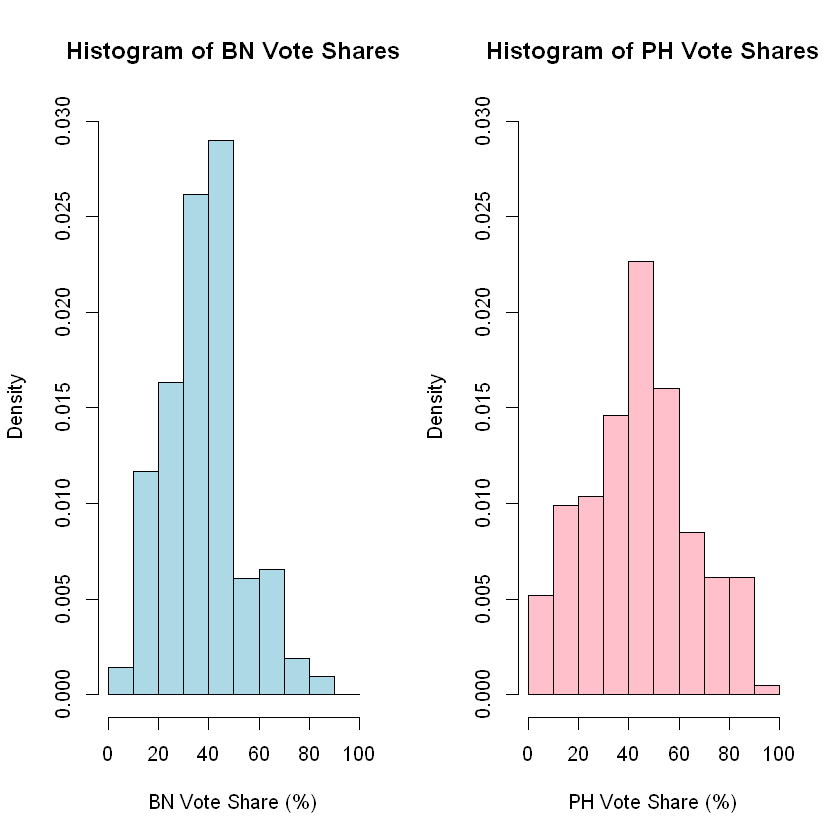

In [48]:
# CREATE A NEW ROW FOR THE PERCENTAGE OF PH VOTE SHARE (AS DID FOR BN EARLIER)

ge18$pctPH <- 100 * (ge18$VOTESPH / ge18$TURNOUT) 

par(mfrow=c(1,2))

hist(ge18$pctBN, 
     freq=FALSE, 
     col="lightblue", 
     breaks=seq(0, 100, 10),
  main = "Histogram of BN Vote Shares",
  xlab = "BN Vote Share (%)",
  xlim = c(0,100), ylim = c(0,0.03))

hist(ge18$pctPH, 
     freq=FALSE, 
     col="pink", 
     breaks=seq(0, 100, 10),
  main = "Histogram of PH Vote Shares",
  xlab = "PH Vote Share (%)",
  xlim = c(0,100), ylim = c(0,0.03))

### Step 9: Make a scatter plot of PH Vote Share by the proportion of voters classified as Bumiputera
- Assess which conditions appear to be met for a linear model

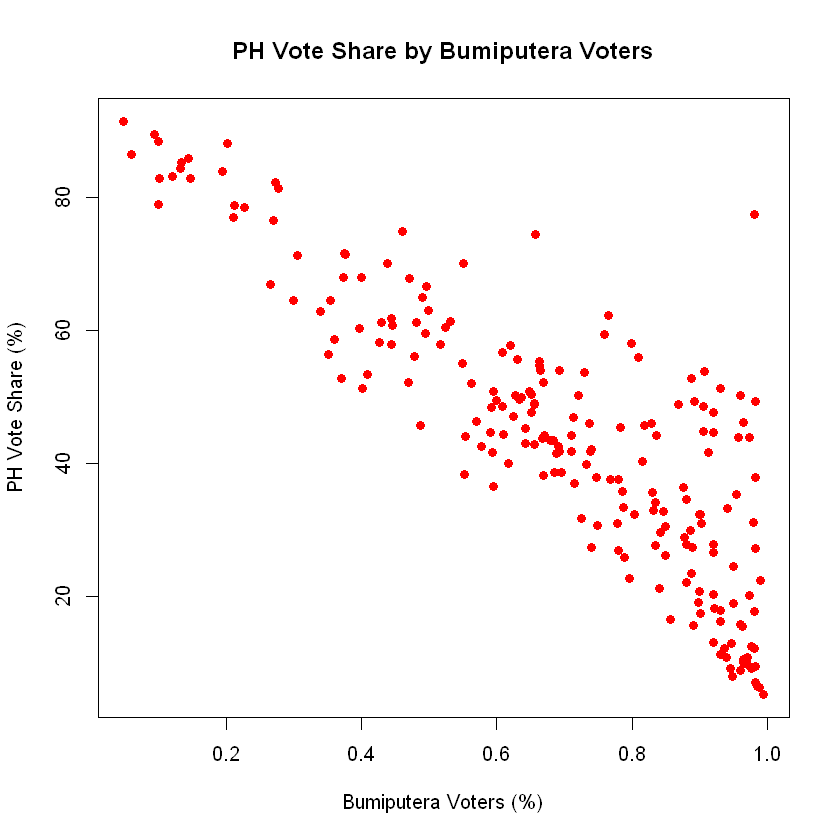

In [49]:
plot(pctPH ~ BUMI, 
     data=ge18, 
     col="red", 
     pch=19,
     xlab="Bumiputera Voters (%)", 
     ylab="PH Vote Share (%)",
     main="PH Vote Share by Bumiputera Voters")

### Step 10: Estimate linear models for PH Vote Share and all ethnicities
- Which model has the highest predictive power?

In [50]:
# CREATE LINEAR MODELS FOR PH VOTE SHARE

lm18.PH.BUMI    <-lm(pctPH ~ BUMI,    data=ge18)
lm18.PH.CHINESE <-lm(pctPH ~ CHINESE, data=ge18)
lm18.PH.INDIAN  <-lm(pctPH ~ INDIAN,  data=ge18)
lm18.PH.OTHER   <-lm(pctPH ~ OTHER,   data=ge18)

# FIND THE R SQUARED VALUES TO FIND THE BEST PREDICTIVE POWER MODEL
summary(lm18.PH.BUMI)$r.squared
summary(lm18.PH.CHINESE)$r.squared
summary(lm18.PH.INDIAN)$r.squared
summary(lm18.PH.OTHER)$r.squared

[1] 0.7293721

[1] 0.6984725

[1] 0.3682286

[1] 0.009369411

## Challenge 3
At this point it should be clear that there is a strong relationship between voting and ethnicity. But the following plot includes an interesting outlier (highlighted in red), with 77% voting for Pakatan Harapan in a district with 98% Bumiputera.

Investigate the outlier. Can you come up with an explanation why it is so different from most other constituencies?

In [51]:
ge18[which(ge18$pctPH > 70 & ge18$BUMI > 0.9),]

,ï..DISTNO,STATE,DISTNAME,VOTESBN,VOTESPH,VOTERS,TURNOUT,AREA,BUMI,CHINESE,INDIAN,OTHER,pctBN,pctPH
189,P189,Sabah,SEMPORNA,6135,26809,48248,34613,1177,0.981,0.016,NA,0.003,17.72455,77.45356


Interesting. The constituency is named SEMPORNA and is located in Sabah in East Malaysia.

For those who are familiar with Sabah, can you think of anything special about Sabah or what happened in the state during the 2018 election that could help us to explain why voters behaved differently than the model would predict?

### Analysis

First and foremost, ethnic identity is different and more complicated in Sabah.

- Much of Sabah’s population is legally classified as Bumiputera

- But this is not the same thing as saying that people in Sabah fit into the MCIO model of race/ethnicity that shapes identity and you have talked about in CC courses like CSI.
    - Sabah only became part of Malaysia along with Sarawak (and Singapore) in 1963.
    - Prior to this, British colonialists did not use MCIO to divide and rule in Sabah as they had in Singapore and Malaya.

- The Bumiputera population of Sabah is quite diverse in terms of religion, language, and traditions:
    - Not everyone who is Bumiputera in Sabah speaks the Malay language, or is Muslim.
    - Over 42 distinct ethno-linguistic groups and 200 sub-groups.

Second and as a result, the relationship between ethnic identity and politics is more complicated and less straight-forward in Sabah than it is in peninsular Malaysia.

Other forms of localised identity also matter for national politics:

- One’s identity as a Sabahan — one who was born in or identifies with Sabah — is arguably more important that ethnic identity in many contexts.
- Whether Bumiputera, Chinese, or Indian, you can be a Sabahan.
- If you identify as a Sabahan, then it might also affect your politics and how you vote…

To this end, the 2018 General Election also saw the emergence of a new, multi-ethnic party in Sabah: The Sabah Heritage Party (Parti Warisan Sabah or Warisan).

- Warisan positioned itself as in favor of greater autonomy for Sabah.
- It also allied itself with the opposition Pakatan Harapan (PH) coalition.
- It proved to be quite popular across the state…

Let us check whether this “Sabah effect” also applies to other constituencies in Sabah.

### Step : Recreate the scatter plot of PH vote share versus Bumiputera voters with different colors for the districts outside and inside Sabah.

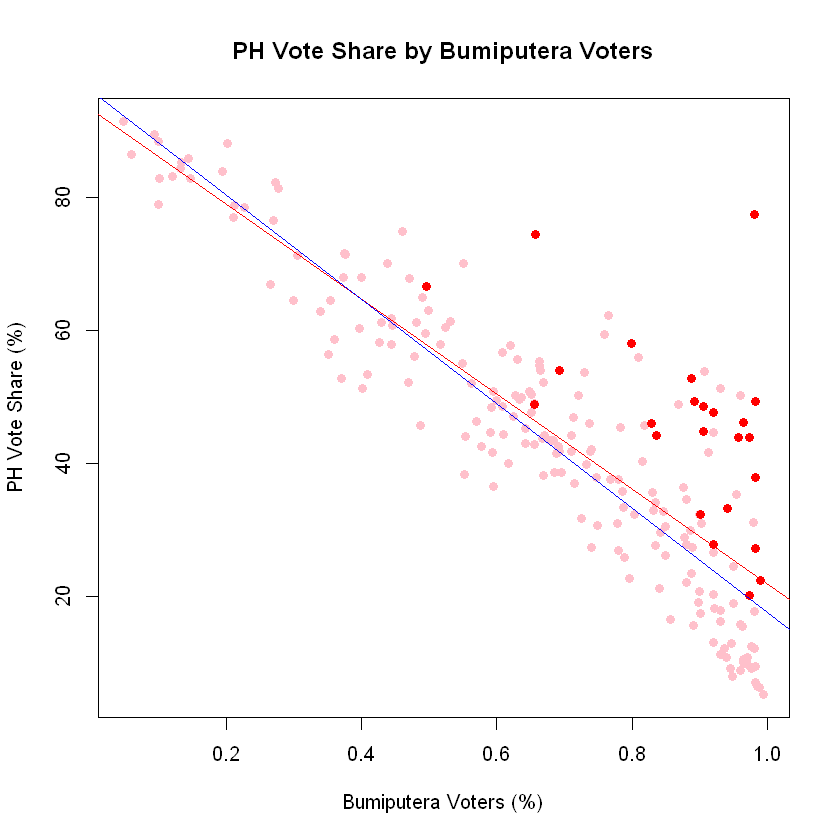

In [58]:
# PLOT ALL THE STATES VOTE SHARE BY BUMIPUTERA VOTERS

plot(pctPH ~ BUMI, 
     data = ge18[ge18$STATE != "Sabah",], 
     col="pink", 
     pch=19,
     xlab="Bumiputera Voters (%)", 
     ylab="PH Vote Share (%)",
     main="PH Vote Share by Bumiputera Voters")

# PLOT FOR SOLELY DISTRICTS IN SABAH

points(pctPH ~ BUMI, 
       data = ge18[ge18$STATE == "Sabah",], 
       col = "red", 
       pch=19,
     xlab="Bumiputera Voters (%)", 
       ylab="PH Vote Share (%)",
     main="PH Vote Share by Bumiputera Voters")

# CREATE A LINEAR MODEL OF BUMIPUTERA VOTES NOT ACCOUNTING FOR SABAH AND ADD LINES WITH BOTH DEFAULT AND MODIFIED MODEL

lm18.PH.BUMI_noSBH <-lm(pctPH ~ BUMI, data = ge18[ge18$STATE != "Sabah",])
abline(lm18.PH.BUMI, col="red")       
abline(lm18.PH.BUMI_noSBH, col="blue")

Comparing the two lines shows that excluding Sabah does not influence the line of best fit by that much. Sabah constituencies are still different, but not influential with regards to the slope between PH vote share and Bumiputera voters.